# Checkpoint Five: Modeling Data
With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: https://www.kaggle.com/datasets/tunguz/inpatient-prospective-payment-system-ipps



# Prepare Your Dataframe
Import any libraries you need and create a dataframe.

In [39]:
#import needed libraires with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Read in dataset, 

df = pd.read_csv("ipps_cleaned.csv")

# Want to see if the dataframe was properly imported and see what kind of data is stored in each column.
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            163065 non-null  int64  
 1   DRG_Definition                        163065 non-null  object 
 2   Provider_Id                           163065 non-null  int64  
 3   Provider_Name                         163065 non-null  object 
 4   Provider_Street_Address               163065 non-null  object 
 5   Provider_City                         163065 non-null  object 
 6   Provider_State                        163065 non-null  object 
 7   Provider_Zip_Code                     163065 non-null  int64  
 8   Hospital_Referral_Region_Description  163065 non-null  object 
 9   _Total_Discharges_                    163065 non-null  int64  
 10  _Average_Covered_Charges_             163065 non-null  float64
 11  

,Unnamed: 0,DRG_Definition,Provider_Id,Provider_Name,Provider_Street_Address,Provider_City,Provider_State,Provider_Zip_Code,Hospital_Referral_Region_Description,_Total_Discharges_,_Average_Covered_Charges_,_Average_Total_Payments_,Average_Medicare_Payments,DRG_definition_without_code,DRG
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES
3,3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES
4,4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,EXTRACRANIAL PROCEDURES W/O CC/MCC,EXTRACRANIAL PROCEDURES


# Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

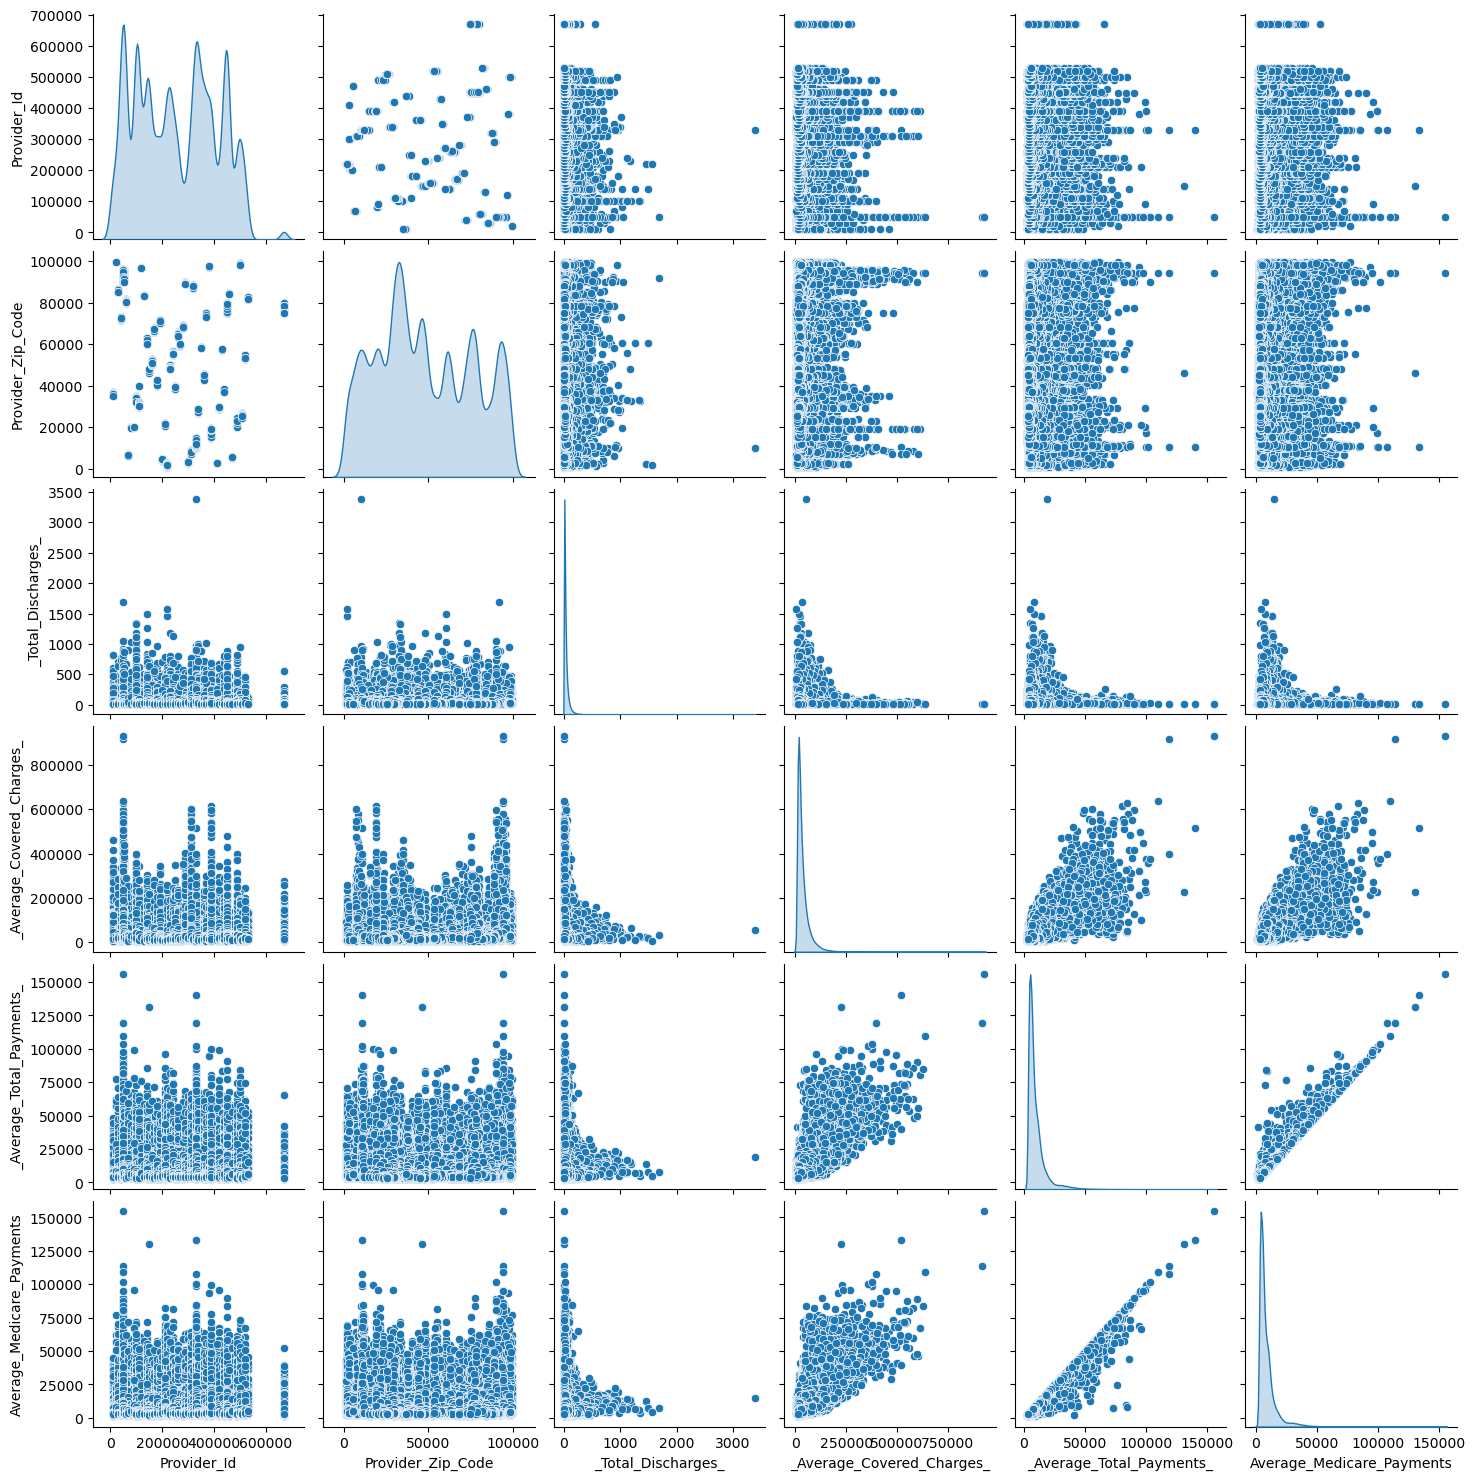

In [22]:
# numerical columns
num_columns= ['Provider_Id', 'Provider_Zip_Code','_Total_Discharges_', '_Average_Covered_Charges_', '_Average_Total_Payments_','Average_Medicare_Payments']
# plooting pair plot for numerical columns
sns.pairplot(vars=np.log(df[num_columns]).columns,data=df, diag_kind='kde')
plt.show()

Obsevations:
There is a good positive correlation between Average_Total_Payments and Average_Medicare_Payments columns
There is slight correlation for Average_Covered_Charges with Average_Total_Payments and Average_Medicare_Payments columns
Atleast seven good clusters can be formed from the dataset

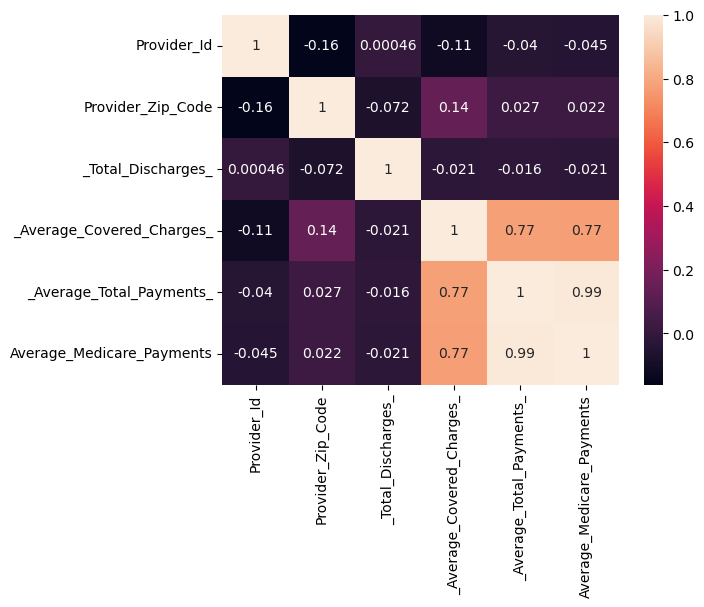

In [24]:
# plotting heat map 
sns.heatmap(corr, annot=True)
plt.show()

In [23]:
# correlation chart between numerical columns.
corr = df[num_columns].corr()
corr.style.background_gradient(cmap='YlGnBu')

,Provider_Id,Provider_Zip_Code,_Total_Discharges_,_Average_Covered_Charges_,_Average_Total_Payments_,Average_Medicare_Payments
Provider_Id,1.000000,-0.160237,0.000456,-0.112490,-0.040059,-0.044846
Provider_Zip_Code,-0.160237,1.000000,-0.071804,0.140658,0.027496,0.022262
_Total_Discharges_,0.000456,-0.071804,1.000000,-0.020766,-0.016020,-0.021299
_Average_Covered_Charges_,-0.112490,0.140658,-0.020766,1.000000,0.774112,0.768927
_Average_Total_Payments_,-0.040059,0.027496,-0.016020,0.774112,1.000000,0.989362
Average_Medicare_Payments,-0.044846,0.022262,-0.021299,0.768927,0.989362,1.000000


Observations on Correlation between numerical columns:
Average_Total_Payments and Average_Medicare_Payments columns are the fetaures which show a strong correlation of 0.98
Average_Covered_Charges has a stronge correlation of 0.83 with Average_Total_Payments and 0.82 with Average_Medicare_Payments
All other columns have a weak correlation

# Create Your Model
Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.



In [44]:
# creating your model
X = df['_Average_Total_Payments_']
y = df['Average_Medicare_Payments']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_sm).fit()

lr.params
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Average_Medicare_Payments   R-squared:                       0.979
Model:                                   OLS   Adj. R-squared:                  0.979
Method:                        Least Squares   F-statistic:                 5.299e+06
Date:                       Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                               11:54:49   Log-Likelihood:            -9.5743e+05
No. Observations:                     114145   AIC:                         1.915e+06
Df Residuals:                         114143   BIC:                         1.915e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -665.2182      5.073   -131.136      0.000    -675.161    -655.276
_Average_Total_Payments_     0.9436      0.000   2301.903      0.000       0.943       0.944
==============================================================================
Omnibus:                   205052.180   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1258421567.700
Skew:                         -12.466   Prob(JB):                         0.00
Kurtosis:                     516.783   Cond. No.                     2.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

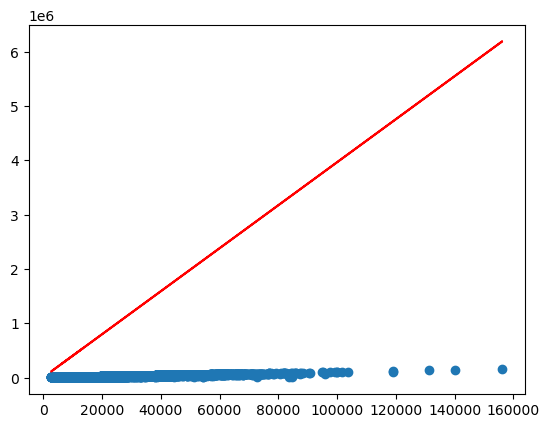

In [41]:
# scatter plot for both columns
plt.scatter(X_train, y_train)
plt.plot(X_train, 4891.2666 + 39.5907*X_train, 'r')
plt.show()


### Error Terms
finally plot your error terms

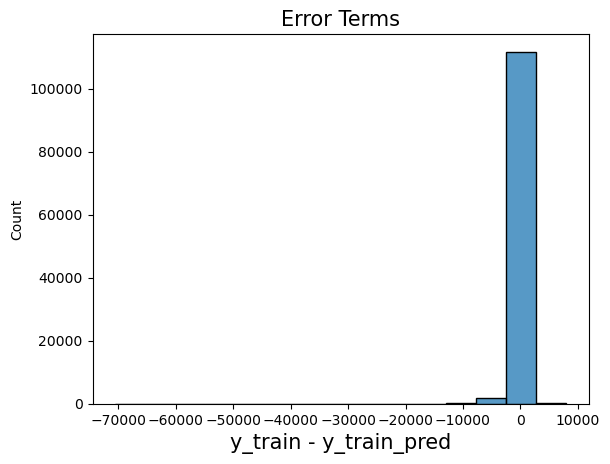

In [43]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


### Summarize Your Work
Make notes of your answers to the questions below.

What was your R-squared value? 0.979
Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? The Regression plots for the three models shows that Best fit line given by Linear Regression shows very less residual errors and good homoscedasticity in the dataset, but the Best fit line given by DecisionTree model shows large residual errors.
The best solution is given by Linear Regression model
Was your plot of the error terms a bell curve? NOt really.